In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data = pd.read_excel('ToyotaCorolla.xls', sheetname='data')

In [62]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


### 중고차 가격을 예측하는 linear regression 모델을 만들어 보자

Price : Euro 기준 중고차 가격 <br>
Age_08_04 : 2004년 8월 기준으로 개월수<br>
KM : Kilometers<br>
Fuel_Type : Petrol, Diesel, CNG<br>
HP : HorsePower<br>
Met_Color : Metalilic Color ?<br>
Automatic : Automatic?<br>
CC : Cylinder Volumn($cm^3$)<br>
Doors : Num of doors<br>
Quarterly_Tzx : Quarterly road tax in EUROs<br>
Weight : 무게(km)

등등등..


In [63]:
data.shape

(1436, 39)

In [64]:
#불필요한 변수 제거
df = data.drop(['Id','Model','Mfg_Month','Mfg_Year'],axis=1)

In [65]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,...,1,1,0,1,0,1,0,0,0,0


In [66]:
# dummy 변수
df1 = pd.get_dummies(df, columns=['Fuel_Type','Color'], drop_first = True)

#### 1) 일단 모든 변수를 다 사용한 경우 rmse 를 계산해 보자

In [67]:
X = np.array(df1.drop('Price', axis=1))
y = np.array(df1['Price'])

from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
kf = KFold(df.shape[0], n_folds=10, random_state=42)

rmse = []
for train_idx, test_idx in kf:
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    rmse.append(np.mean((lr.predict(X_test) - y_test)**2)**0.5)

In [68]:
np.mean(rmse)

1455.1638641736731

In [69]:
np.std(rmse)

917.00542217873078

### 변수 선택하기

##### 방법 1) chi2

반드시 non-negative 한 변수들에 적용가능

In [70]:
X = df1.drop('Price', axis=1)
y = df1['Price']

In [71]:
from sklearn.feature_selection import chi2
chi2score, pval = chi2(X, y)

In [72]:
chi2score

array([  7.60645368e+03,   1.40159545e+07,   1.06161647e+03,
         8.64954193e+01,   2.36823474e+02,   1.91922524e+04,
         6.31200356e+01,   1.06164802e-29,   1.21518547e+00,
         8.19543984e+03,   2.18526030e+03,   1.79463881e+02,
         3.84144969e+01,   1.53149056e+03,   6.86421933e+01,
         4.84965514e+00,   8.37236202e+01,   2.36366333e+02,
         9.20647202e+02,   5.70534849e+02,   4.92825064e+02,
         1.49113015e+02,   1.54281568e+02,   3.08541652e+00,
         2.23290280e+02,   2.29965513e+02,   2.89582570e+02,
         6.21582084e+01,   2.45773608e+02,   2.23932482e+02,
         1.06792519e+02,   1.68264584e+02,   3.28914930e+02,
         4.12681765e+01,   2.09235817e+02,   2.24866134e+02,
         1.88136464e+02,   2.47593921e+02,   2.02555615e+02,
         2.42490247e+02,   2.82389842e+01,   2.24653937e+02,
         1.87677656e+02])

In [73]:
chi2_df = DataFrame()
chi2_df['attribute'] = df1.columns[1:]
chi2_df['score'] = chi2score

In [74]:
chi2_df.sort_values('score', ascending=False)

,attribute,score
1,KM,1.401595e+07
5,CC,1.919225e+04
9,Quarterly_Tax,8.195440e+03
0,Age_08_04,7.606454e+03
10,Weight,2.185260e+03
13,Guarantee_Period,1.531491e+03
2,HP,1.061616e+03
18,Automatic_airco,9.206472e+02
19,Boardcomputer,5.705348e+02
20,CD_Player,4.928251e+02


In [75]:
top_chi2_features = chi2_df.sort_values('score', ascending=False)['attribute'][:20]

##### Recursive feature elimination

전체 변수를 활용하여 Linear model을 돌리고 <br>
그 weight 값이 작은 것부터 하나씩 제거하는 방법

In [76]:
from sklearn.feature_selection import RFE

In [77]:
lr = LinearRegression()
lr.fit(X, y)
rfe = RFE(estimator=lr, 
          n_features_to_select=20, #종료 조건
          step=1) #각 단계마다 몇개씩 변수를 제거할 것인지
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  estimator_params=None, n_features_to_select=20, step=1, verbose=0)

In [78]:
rfe.support_ #선택된 attribute
rfe.ranking_ #ranking : 선택된 건 모두 1

array([10, 23, 18,  4,  1, 22,  2, 24,  1, 19, 21,  1,  1, 14,  1, 11,  1,
        1,  1,  1,  1, 13,  1, 12,  1, 20,  1, 16,  5,  1,  1, 17,  1,  1,
        6,  7,  9,  1,  8,  1,  3,  1, 15])

In [79]:
top_RFE_features = X.columns[rfe.support_]

##### Feature Selection with Model

Lasso (L1 - norm)

.

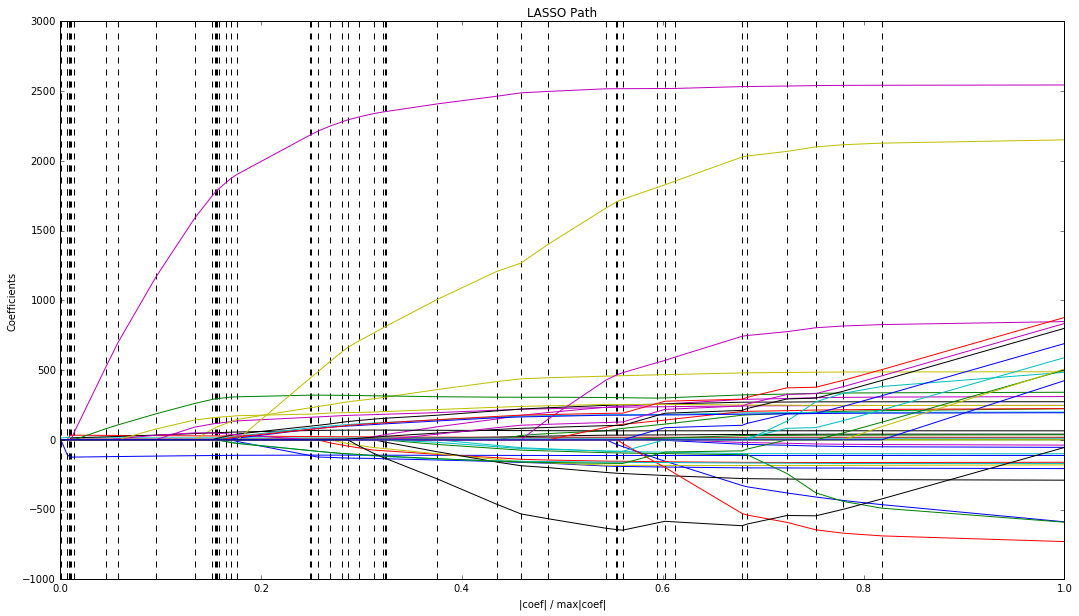

In [80]:
%matplotlib inline
from sklearn import linear_model
alphas, _, coefs = linear_model.lars_path(np.array(X), np.array(y), method='lasso', verbose=True)

plt.figure(figsize=(18,10))
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [81]:
clf = linear_model.Lasso(alpha=20)
clf.fit(np.array(X), np.array(y))

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
np.sum(clf.coef_ != 0)

20

In [83]:
top_lasso_features = X.columns[clf.coef_ != 0]

##### Tree based Feature Selection

Decision Tree / Random Forest

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

array([ 0.12361479,  0.1222717 ,  0.03092874,  0.03285201,  0.01020341,
        0.02634236,  0.04363268,  0.        ,  0.00371827,  0.03226721,
        0.06707997,  0.041862  ,  0.01581529,  0.01284175,  0.01249568,
        0.00409206,  0.01486235,  0.01808214,  0.00560805,  0.01212986,
        0.01647351,  0.02283252,  0.02214395,  0.0031139 ,  0.01388352,
        0.01597317,  0.0239504 ,  0.01677519,  0.02200498,  0.01505469,
        0.00072461,  0.03308547,  0.00556539,  0.00628581,  0.02308508,
        0.03004296,  0.0219871 ,  0.02598012,  0.02841313,  0.0162312 ,
        0.00036436,  0.00454198,  0.00078666])

In [85]:
tree_features_df = DataFrame()
tree_features_df['attribute'] = df1.columns[1:]
tree_features_df['score'] = clf.feature_importances_  

In [86]:
tree_features_df.sort_values('score', ascending=False)

,attribute,score
0,Age_08_04,0.123615
1,KM,0.122272
10,Weight,0.067080
6,Doors,0.043633
11,Mfr_Guarantee,0.041862
31,Tow_Bar,0.033085
3,Met_Color,0.032852
9,Quarterly_Tax,0.032267
2,HP,0.030929
35,Color_Blue,0.030043


In [87]:
top_tree_features = tree_features_df.sort_values('score', ascending=False)['attribute'][:20]

In [88]:
selectedFeatures = list(set(list(top_chi2_features) + list(top_RFE_features) + list(top_lasso_features) + list(top_tree_features)))

In [89]:
selectedFeatures

['CC',
 'Sport_Model',
 'Doors',
 'Radio',
 'Automatic_airco',
 'Color_White',
 'Age_08_04',
 'Guarantee_Period',
 'Color_Grey',
 'Metallic_Rim',
 'Color_Black',
 'Tow_Bar',
 'Mistlamps',
 'Radio_cassette',
 'BOVAG_Guarantee',
 'Parking_Assistant',
 'Powered_Windows',
 'CD_Player',
 'Fuel_Type_Diesel',
 'Automatic',
 'KM',
 'ABS',
 'Central_Lock',
 'Airbag_2',
 'Quarterly_Tax',
 'HP',
 'Color_Green',
 'Color_Blue',
 'Boardcomputer',
 'Gears',
 'Color_Red',
 'Weight',
 'Airco',
 'Mfr_Guarantee',
 'Fuel_Type_Petrol',
 'Met_Color',
 'Color_Silver']

In [90]:
len(selectedFeatures)

37

In [ ]:
#code
#selectedFeatures 를 활용해 model의 성능이 나아졌는지 확인하시오

In [91]:
X = np.array(df1[selectedFeatures])
y = np.array(df1['Price'])


from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
kf = KFold(df.shape[0], n_folds=10, random_state=42)

rmse2 = []
for train_idx, test_idx in kf:
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    rmse2.append(np.mean((lr.predict(X_test) - y_test)**2)**0.5)

In [92]:
np.mean(rmse2)

1446.6710189212295

In [93]:
np.std(rmse2)

899.22147415283746